# Чтение файла и вывод основной информации
импорт библиотек и файла, знакомство с датасетом

Импорт необходимых библиотеки для работы с датасетом и создания графиков

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('raw.csv').drop_duplicates()
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5.0,7.0,1.0,34.6,...,-1.0,-1,18 м²,8 м²,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14.0,45.0,1.0,41.3,...,-1.0,Без отделки,20 м²,11 м²,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10.0,12.0,1.0,34.4,...,-1.0,"Без отделки, черновая, чистовая","11,8 м²","11,7 м²",7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4.0,33.0,1.0,42.9,...,-1.0,-1,"22,9 м²",15 м²,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1.0,16.0,1.0,37.7,...,-1.0,-1,-1,-1,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


In [ ]:
df.shape

(10582, 24)

In [ ]:
# ознакомление с признаками
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10411 non-null  object 
 1   author_type           10408 non-null  object 
 2   url                   10578 non-null  object 
 3   location              10174 non-null  object 
 4   deal_type             10581 non-null  object 
 5   accommodation_type    10581 non-null  object 
 6   floor                 10581 non-null  float64
 7   floors_count          10581 non-null  float64
 8   rooms_count           10581 non-null  float64
 9   total_meters          10581 non-null  object 
 10  price                 10548 non-null  float64
 11  year_of_construction  10581 non-null  object 
 12  object_type           10578 non-null  float64
 13  house_material_type   10578 non-null  object 
 14  heating_type          10578 non-null  float64
 15  finish_type        

# Очистка данных
вывожу более подробную информацию о датасете, составляю план очистки

заново вывожу срез по первым данным датасета, только теперь с возможностью просмотра всех колонок, также более подробно вывожу информацию о пропущенных значениях и типам данных в колонках, чтобы составить для себя план очистки датасета

In [5]:
pd.set_option('display.max_columns', None) # настройка отображения таблицы, чтобы отображались все колонки
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5.0,7.0,1.0,34.6,9000000.0,1978,-1.0,-1,-1.0,-1,18 м²,8 м²,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14.0,45.0,1.0,41.3,12800000.0,2026,-1.0,-1,-1.0,Без отделки,20 м²,11 м²,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10.0,12.0,1.0,34.4,19372498.0,2026,-1.0,Монолитно-кирпичный,-1.0,"Без отделки, черновая, чистовая","11,8 м²","11,7 м²",7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4.0,33.0,1.0,42.9,23600000.0,-1,-1.0,-1,-1.0,-1,"22,9 м²",15 м²,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1.0,16.0,1.0,37.7,9450000.0,1982,-1.0,-1,-1.0,-1,-1,-1,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


в процессе парсинга пустые значения могли быть заполнены или Nan, или -1. Чтобы корректно понимать количество пропущенных значений заменяю значение -1 на NaN по всему датасету (и т.к. значения -1 принимают разную форму, для надежности заменяю её в различных вариациях)

In [6]:
df = df.replace(-1, np.nan)
df = df.replace(-1.0, np.nan)
df = df.replace("-1", np.nan)
df = df.replace("-1.0", np.nan)

In [7]:
# количество пропущенных значений в датасете
df.isnull().sum()

author                    171
author_type               174
url                         4
location                  408
deal_type                   1
accommodation_type          1
floor                       1
floors_count                1
rooms_count                73
total_meters                1
price                      34
year_of_construction     2215
object_type             10582
house_material_type      9331
heating_type            10582
finish_type              8867
living_meters            2454
kitchen_meters           1536
phone                       4
district                 4600
street                   1492
house_number             1137
underground              3908
residential_complex      5784
dtype: int64

In [8]:
# типы данных по колонкам
df.dtypes

author                   object
author_type              object
url                      object
location                 object
deal_type                object
accommodation_type       object
floor                   float64
floors_count            float64
rooms_count             float64
total_meters             object
price                   float64
year_of_construction     object
object_type             float64
house_material_type      object
heating_type            float64
finish_type              object
living_meters            object
kitchen_meters           object
phone                   float64
district                 object
street                   object
house_number             object
underground              object
residential_complex      object
dtype: object

Смотрю на выведенную информацию и составляю некий план, по которому буду очищать датасет:

1. Cразу принимаю за ненужные колонки, которые не будут влиять на анализ и которые можно удалить сразу, следующие:
- author (информация о том, как зовут человека, который продаёт квартиру, или название компании, которая этим занимается не будет влиять на цену)
- url (ссылки на обьявление никаким образом не будут влиять на цену)
- deal_type (по всему датасету один тип сделки - продажа)
- accomodation_type (по всему датасету один тип жилья - квартира)
- phone (телефон для связи никак не будет влиять на цену)
- object_type (все значения отсутсвуют)
- heating_type (все значения отсутствуют)

2. необходимо разобраться с пропущеными значениями: удалить строки, где пропущены ключевые значения и колонки, где пропущено слишком много значений. также заполнить колонки данными, где это возможно сделать, чтобы не потерять большое количество файлов

3. понимаю, что нужно изменить типы данных колонок:
- из float в int - floor, floors_count, rooms_count, price
- из object в int или float - total_meters, year_of_construction, living_meters

# 1 - удаление ненужных столбцов

In [9]:
# удаляю ненужные столбцы (axis=1 - удаляем столбцы, axis=0 (default) - удаляем строки)
df.drop(['author', 'url', 'deal_type', 'accommodation_type', 'phone', 'object_type', 'heating_type'], axis=1, inplace=True)

# 2 - пропущенные значения
Избавляюсь от пропущенных значений, которые видно сразу

In [10]:
# для удобства повторно вывожу количество всех пустых значений по датасету
print('Пропущенные значения:\n', df.isnull().sum())

Пропущенные значения:
 author_type              174
location                 408
floor                      1
floors_count               1
rooms_count               73
total_meters               1
price                     34
year_of_construction    2215
house_material_type     9331
finish_type             8867
living_meters           2454
kitchen_meters          1536
district                4600
street                  1492
house_number            1137
underground             3908
residential_complex     5784
dtype: int64


Смотрю на ключевые переменные и вижу, что в location, rooms_count, и price есть пропущенные значения, а это ключевые переменные, которые обычно влияют на цену квартиры больше всего. Именно поэтому удаляю строки, где эти значения пропущены

In [11]:
df = df.dropna(subset=['location', 'rooms_count', 'price'])

для проверки вывожу дополнительно пропущенные значения после удаления строк, и вижу что в переменных, в которых было по одному пропущенному значению, эти значения убрались. Скорее всего была строчка, в которой не было значений совсем, поэтому это произошло.

In [12]:
print('Пропущенные значения:\n', df.isnull().sum())
print('Размер датасета после удаления строк с пропущенными значниеями в location:\n', df.shape)

Пропущенные значения:
 author_type              146
location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                      0
year_of_construction    2099
house_material_type     8871
finish_type             8458
living_meters           2316
kitchen_meters          1407
district                4476
street                  1393
house_number            1037
underground             3489
residential_complex     5473
dtype: int64
Размер датасета после удаления строк с пропущенными значниеями в location:
 (10069, 17)


In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 1%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
house_material_type - 88%
finish_type - 84%
living_meters - 23%
kitchen_meters - 14%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


посмотря на выведенную информацию очень сильно выделяются колонки house_material_type и finish_type - в них слишком большое количество пропусков - 84 и 88 процентов, так что удаляю эти колонки

In [14]:
df.drop(['house_material_type', 'finish_type'], axis=1, inplace=True)

# промежуточные итоги работы с пропущенными значениями
остаются более сложные для очистки колонки, поэтому, чтобы не потеряться в данных повторно вывожу данные о колонках и планирую последующие действия

In [15]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 1%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
living_meters - 23%
kitchen_meters - 14%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


Подвожу промежуточные итоги по избавлению от пропущенных значений и составляю небольшой список предстоящих действий с колонками, чтобы было легче ориентироваться и работать с данными в дальнейшем
- autor_type - можно заполнить самым частым значением
- year_of_construction - также можно заполнить самым частым значением, это не будет особо критично, но зато не придется терять 21% от датасета 
- living_meters - можно попробовать сделать функцию для рассчёта жилых метров, основываясь на пропорции общего метража с жилым
- kitchen_meters - аналогично с living_meters
- district - если обьявление не из москвы ставить туда город, если москва - метро (если оно есть) или просто значение москва (если значение метро - nan)
- street - пропущенных значений не очень много, теоретически можно снести, ибо как заполнять не имею представления
- house number - возможно стоит снести всю колонку, потому что сомнительно что эта переменная будет влиять на цену
- underground - метро, важный фактор, можно заполнить городом, что не хотелось бы делать, либо удалить строки с пропущенными значениями, хотя и удалится достаточно много
- residential_complex - слишком много пропущенных значений, заполнить проблематично, влиять на цену будет поидее не сильно существенно. Лучшим решением будет снести колонку

# работа с колонками author_type и year_of_construction
заполняю пропущенные значения модой

In [16]:
# смотрю самое частое значение в колонке author_type, чтобы заполнить им пропущенные значения
author_mode_value = df['author_type'].mode()[0]
df['author_type'] = df['author_type'].fillna(author_mode_value)

year_mode_value = df['year_of_construction'].mode()[0]
df['year_of_construction'] = df['year_of_construction'].fillna(year_mode_value)

In [17]:
# проверяю, всё ли заменилось корректно, не осталось ли пропущенных значений
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 23%
kitchen_meters - 14%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# работа с колонками living_meters и kitchen_meters

заполнение пропущенными значениями, а также преобразование типа данных в колонках living_meters, kitchen_meters и total_meters

дальше работаю с колонками living_meters и kitchen_meters, нужно написать функцию, которая будет рассчитывать количество жилых метров на основе общего метража и жилого метража или метража кухни. Для этого сначала нужно привести данные в этих колонках в вид, в котором с ними можно будет работать - из object данные нужно перевести в тип float

In [18]:
# смотрю как выглядят значения, чтобы понять как конвертировать их в числовые
print('Уникальные значения для колонки living_meters:\n', df['living_meters'].unique().tolist())
print('Уникальные значения для колонки kitchen_meters:\n', df['kitchen_meters'].unique().tolist())

Уникальные значения для колонки living_meters:
 ['18\xa0м²', '20\xa0м²', '11,8\xa0м²', '22,9\xa0м²', nan, '18,8\xa0м²', '17,6\xa0м²', '10,1\xa0м²', '9,1\xa0м²', '11,7\xa0м²', '69\xa0м²', '17,1\xa0м²', '17,9\xa0м²', '13,5\xa0м²', '11,4\xa0м²', '16,1\xa0м²', '19\xa0м²', '18,4\xa0м²', '45\xa0м²', '11,5\xa0м²', '13,1\xa0м²', '19,5\xa0м²', '11,2\xa0м²', '24,2\xa0м²', '12,8\xa0м²', '10,8\xa0м²', '16,3\xa0м²', '10,3\xa0м²', '15,3\xa0м²', '17\xa0м²', '23,4\xa0м²', '26,8\xa0м²', '39\xa0м²', '20,7\xa0м²', '37\xa0м²', '9,7\xa0м²', '48,9\xa0м²', '16,4\xa0м²', '10,6\xa0м²', '16\xa0м²', '30\xa0м²', '12,2\xa0м²', '24\xa0м²', '21\xa0м²', '14,2\xa0м²', '22\xa0м²', '9,4\xa0м²', '10\xa0м²', '12,3\xa0м²', '14,1\xa0м²', '19,9\xa0м²', '21,5\xa0м²', '24,1\xa0м²', '34,5\xa0м²', '19,1\xa0м²', '11,3\xa0м²', '13\xa0м²', '25\xa0м²', '41,7\xa0м²', '25,8\xa0м²', '17,2\xa0м²', '11\xa0м²', '27\xa0м²', '25,3\xa0м²', '18,1\xa0м²', '13,7\xa0м²', '12,5\xa0м²', '15\xa0м²', '25,5\xa0м²', '45,1\xa0м²', '15,8\xa0м²', '45,8\x

In [19]:
# преобразую в float, учитывая формат данных (для того, чтобы убрать лишние символы использую регулярные выражения)
import re

def extract_numbers_and_convert_to_float(df, column):
    df[column] = df[column].apply(lambda x: float(re.sub(r'[^\d\.,]', '', str(x)).replace(',', '.')) if 
                                  pd.notna(x) and re.match(r'^\d+(,\d+)?$', re.sub(r'[^\d\.,]', '', str(x))) else x)
    return df
  
df = extract_numbers_and_convert_to_float(df, 'living_meters')
df = extract_numbers_and_convert_to_float(df, 'kitchen_meters')

In [20]:
# вывожу значения, чтобы понять, что всё сработало правильно
print('Уникальные значения для колонки living_meters:\n', df['living_meters'].unique().tolist())
print('Уникальные значения для колонки kitchen_meters:\n', df['kitchen_meters'].unique().tolist())
print('Тип данных для колонки living_meters:', df['living_meters'].dtype)
print('Тип данных для колонки kitchen_meters:', df['kitchen_meters'].dtype)

Уникальные значения для колонки living_meters:
 [18.0, 20.0, 11.8, 22.9, nan, 18.8, 17.6, 10.1, 9.1, 11.7, 69.0, 17.1, 17.9, 13.5, 11.4, 16.1, 19.0, 18.4, 45.0, 11.5, 13.1, 19.5, 11.2, 24.2, 12.8, 10.8, 16.3, 10.3, 15.3, 17.0, 23.4, 26.8, 39.0, 20.7, 37.0, 9.7, 48.9, 16.4, 10.6, 16.0, 30.0, 12.2, 24.0, 21.0, 14.2, 22.0, 9.4, 10.0, 12.3, 14.1, 19.9, 21.5, 24.1, 34.5, 19.1, 11.3, 13.0, 25.0, 41.7, 25.8, 17.2, 11.0, 27.0, 25.3, 18.1, 13.7, 12.5, 15.0, 25.5, 45.1, 15.8, 45.8, 14.0, 9.5, 12.0, 10.9, 12.9, 6.6, 13.9, 25.4, 12.4, 10.5, 10.4, 8.1, 9.2, 10.7, 17.3, 13.4, 14.5, 14.4, 14.3, 21.1, 20.1, 17.5, 9.0, 11.1, 22.3, 7.1, 19.7, 20.9, 10.2, 15.4, 11.9, 15.2, 14.6, 21.3, 23.5, 16.8, 13.2, 28.5, 18.5, 32.8, 6.3, 8.0, 11.6, 18.9, 27.7, 13.8, 17.7, 20.6, 18.2, 17.8, 29.2, 23.0, 38.0, 18.7, 21.2, 15.7, 19.8, 9.8, 16.6, 15.6, 27.3, 16.7, 17.4, 19.4, 19.6, 33.0, 14.7, 26.0, 16.5, 19.3, 28.9, 21.9, 21.8, 22.7, 20.2, 22.8, 23.2, 23.8, 18.6, 14.9, 42.0, 44.4, 41.2, 43.3, 57.0, 32.0, 29.6, 35.0, 18.3

In [21]:
# смотрю на внешний вид значений колонки total_meters
print('Уникальные значения для колонки total_meters:\n', df['total_meters'].unique().tolist())
print('Тип данных для колонки total_meters:', df['total_meters'].dtype)

Уникальные значения для колонки total_meters:
 ['34.6', '41.3', '34.4', '42.9', '37.7', '32.6', '37.6', '33.7', '34.7', '34.8', '123.0', '34.1', '33.0', '47.4', '37.5', '36.8', '50.2', '40.0', '39.8', '51.0', '36.0', '47.8', '40.74', '32.11', '36.46', '36.23', '36.71', '35.39', '32.25', '27.7', '39.6', '35.83', '34.27', '40.9', '45.9', '45.5', '29.54', '30.1', '27.38', '57.6', '41.5', '45.7', '59.0', '38.5', '65.9', '57.0', '36.5', '39.37', '59.35', '31.0', '45.0', '38.2', '43.09', '48.1', '40.62', '46.0', '35.4', '45.3', '43.0', '38.7', '72.6', '31.61', '14.4', '48.3', '30.0', '55.8', '31.8', '39.22', '35.1', '47.5', '37.8', '78.45', '30.5', '49.8', '37.35', '33.5', '23.9', '39.0', '36.7', '60.0', '64.4', '30.8', '40.8', '43.9', '35.67', '55.5', '40.4', '49.3', '32.07', '39.1', '44.6', '38.0', '45.2', '31.4', '48.5', '58.8', '48.4', '53.4', '43.5', '32.9', '85.04', '43.6', '40.6', '33.56', '32.2', '22.17', '36.28', '36.2', '44.48', '34.54', '39.2', '43.31', '36.15', '35.0', '33.9', '4

In [22]:
# перевод значений колонки total_meters из object в числовое
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')

In [23]:
# вывожу значения для проверки
print('Уникальные значения для колонки total_meters:\n', df['total_meters'].unique().tolist())
print('Новый тип данных для колонки total_meters:', df['total_meters'].dtype)

Уникальные значения для колонки total_meters:
 [34.6, 41.3, 34.4, 42.9, 37.7, 32.6, 37.6, 33.7, 34.7, 34.8, 123.0, 34.1, 33.0, 47.4, 37.5, 36.8, 50.2, 40.0, 39.8, 51.0, 36.0, 47.8, 40.74, 32.11, 36.46, 36.23, 36.71, 35.39, 32.25, 27.7, 39.6, 35.83, 34.27, 40.9, 45.9, 45.5, 29.54, 30.1, 27.38, 57.6, 41.5, 45.7, 59.0, 38.5, 65.9, 57.0, 36.5, 39.37, 59.35, 31.0, 45.0, 38.2, 43.09, 48.1, 40.62, 46.0, 35.4, 45.3, 43.0, 38.7, 72.6, 31.61, 14.4, 48.3, 30.0, 55.8, 31.8, 39.22, 35.1, 47.5, 37.8, 78.45, 30.5, 49.8, 37.35, 33.5, 23.9, 39.0, 36.7, 60.0, 64.4, 30.8, 40.8, 43.9, 35.67, 55.5, 40.4, 49.3, 32.07, 39.1, 44.6, 38.0, 45.2, 31.4, 48.5, 58.8, 48.4, 53.4, 43.5, 32.9, 85.04, 43.6, 40.6, 33.56, 32.2, 22.17, 36.28, 36.2, 44.48, 34.54, 39.2, 43.31, 36.15, 35.0, 33.9, 43.65, 26.3, 42.2, 38.28, 40.79, 37.74, 35.13, 38.14, 38.6, 38.84, 15.1, 37.9, 34.2, 35.98, 41.28, 36.3, 34.3, 42.5, 40.7, 44.19, 38.35, 36.9, 37.2, 40.2, 28.1, 41.87, 36.55, 30.6, 56.0, 37.12, 32.86, 36.6, 29.3, 38.9, 33.4, 41.0, 4

In [24]:
# вычисление коэффициентов на основе данных без пропущенных значений
living_meters_coef = df.dropna(subset=['living_meters', 'total_meters'])['living_meters'].mean() / df.dropna(subset=['living_meters', 'total_meters'])['total_meters'].mean()
kitchen_meters_coef = df.dropna(subset=['kitchen_meters', 'total_meters'])['kitchen_meters'].mean() / df.dropna(subset=['kitchen_meters', 'total_meters'])['total_meters'].mean()

# вывод коэффициентов для проверки адекватности рассчетов
print(living_meters_coef)
print(kitchen_meters_coef)


# заполнение пропущенных значений на основе полученнх коэффициентов
df['living_meters'] = df['living_meters'].fillna(df['total_meters'] * living_meters_coef)
df['kitchen_meters'] = df['kitchen_meters'].fillna(df['total_meters'] * kitchen_meters_coef)


0.5754598504360167
0.17557545994329687


In [25]:
# вывожу информацию для проверки заполнения
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# работа с колонкой district

заполнение пропущенными значениями на основании колонок location и underground

In [26]:
# чтобы лучше ориентироваться в очередной вывожу данные о количестве пропусков
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


заполняю пропуски в колонке по принципу: если обьявление не из москвы ставить туда город, если москва - метро (если оно есть) или просто значение москва (если значение метро - nan)

In [27]:
# заменяю пропуски в колонке district
df['district'] = df.apply(lambda row: row['underground'] if pd.isna(row['district']) and row['location'] == 'Москва' and pd.notna(row['underground']) 
                          else 'Москва' if pd.isna(row['district']) and row['location'] == 'Москва' else row['location'] if pd.isna(row['district']) and row['location'] != 'Москва' else row['district'], axis=1)

In [28]:
# вывожу данные о пропусках чтобы проверить правильность заполнения колонки
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 0%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# работа с оставшимися колонками
удаление колонок house_nubmer и residental_complex, удаление строк с пропущенными значениями в street и underground

In [29]:
# смотрю на оставшиеся колонки
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 0%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


In [30]:
# удаляю колонки residential_complex из-за слишком большого количества прощушенных значений и house_number, который не влияет на целевую переменную
df.drop(['residential_complex', 'house_number'], axis=1, inplace=True)
# также чищу датасет от строк с пропущенными значениями в underground и street
df = df.dropna(subset=['underground', 'street'])

In [31]:
# смотрю на вид даных в последних колонках, вижу что у street есть ненужные пробелы
print('Уникальные значения для колонки street:\n', df['street'].unique().tolist())
print('Уникальные значения для колонки underground:\n', df['underground'].unique().tolist())

Уникальные значения для колонки street:
 ['15-я Парковая ', 'Перовское шоссе', 'Электрозаводская ', ' Годовикова', 'Варшавское шоссе', ' Гастелло', ' Бачуринская', 'Открытое шоссе', '1-й Красногвардейский проезд', 'Чертановская ', ' Матросская Тишина', ' Зорге', 'Ленинский проспект', 'Солнцевский проспект', ' Золотошвейная', 'Ленинградское шоссе', ' Поликарпова', ' Генерала Донскова', ' Брусилова', ' Лесные Поляны 5-я', '1-я Тверская-Ямская ', 'Ленинградский проспект', ' Фридриха Энгельса', ' Костикова', 'Жулебинский бульвар', 'набережная Пресненская', 'Волгоградский проспект', ' Кузнецкий Мост', 'Мичуринский проспект', 'Береговой проезд', 'Производственная ', 'Автозаводская ', 'Винницкая ', 'Ходынская ', 'Нежинская ', ' Эдварда Грига', 'Шелепихинская набережная', ' Улофа Пальме', 'Большой Волоколамский проезд', '48-й кв-л', ' 2-я Энтузиастов', 'Софийская набережная', 'Щелковское шоссе', 'Космодамианская набережная', ' Жемчужная', 'Ельнинская ', '31/2', ' Покровка', 'Краснопресненская 

In [32]:
# убираю эти пробелы методом strip
df['street'] = df['street'].apply(lambda x: x.strip())

In [33]:
# повторно вывожу значения для проверки
print('Уникальные значения для колонки street:\n', df['street'].unique().tolist())

Уникальные значения для колонки street:
 ['15-я Парковая', 'Перовское шоссе', 'Электрозаводская', 'Годовикова', 'Варшавское шоссе', 'Гастелло', 'Бачуринская', 'Открытое шоссе', '1-й Красногвардейский проезд', 'Чертановская', 'Матросская Тишина', 'Зорге', 'Ленинский проспект', 'Солнцевский проспект', 'Золотошвейная', 'Ленинградское шоссе', 'Поликарпова', 'Генерала Донскова', 'Брусилова', 'Лесные Поляны 5-я', '1-я Тверская-Ямская', 'Ленинградский проспект', 'Фридриха Энгельса', 'Костикова', 'Жулебинский бульвар', 'набережная Пресненская', 'Волгоградский проспект', 'Кузнецкий Мост', 'Мичуринский проспект', 'Береговой проезд', 'Производственная', 'Автозаводская', 'Винницкая', 'Ходынская', 'Нежинская', 'Эдварда Грига', 'Шелепихинская набережная', 'Улофа Пальме', 'Большой Волоколамский проезд', '48-й кв-л', '2-я Энтузиастов', 'Софийская набережная', 'Щелковское шоссе', 'Космодамианская набережная', 'Жемчужная', 'Ельнинская', '31/2', 'Покровка', 'Краснопресненская набережная', 'Бианки', 'Крес

далее вывожу финальные данные по пропущенным значениям, чтобы проверить, что ничего не осталось и переходить к следующим действиям

In [34]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 0%
street - 0%
underground - 0%


<Axes: >

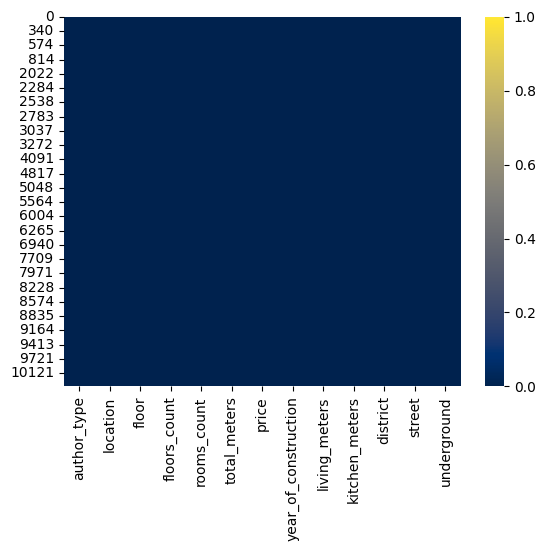

In [35]:
# график (тепловая карта) для просмотра пропущенных значений
sns.heatmap(df.isnull(),cmap='cividis') 

In [36]:
print('Пропущенные значения:\n', df.isnull().sum())

Пропущенные значения:
 author_type             0
location                0
floor                   0
floors_count            0
rooms_count             0
total_meters            5
price                   0
year_of_construction    0
living_meters           2
kitchen_meters          0
district                0
street                  0
underground             0
dtype: int64


вижу, что осталось совсем мало пропущенных значений и спокойно их удаляю

In [37]:
df.dropna(inplace=True)

In [38]:
print('Пропущенные значения:\n', df.isnull().sum())

Пропущенные значения:
 author_type             0
location                0
floor                   0
floors_count            0
rooms_count             0
total_meters            0
price                   0
year_of_construction    0
living_meters           0
kitchen_meters          0
district                0
street                  0
underground             0
dtype: int64


In [39]:
# смотрю на внешний вид датасета и его размерность. Пришлось удалить достаточно много строк, но пропусков больше нет.
df

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground
0,real_estate_agent,Москва,5.0,7.0,1.0,34.6,9000000.0,1978,18.000000,8.000000,Северное Измайлово,15-я Парковая,Щёлковская
1,real_estate_agent,Москва,14.0,45.0,1.0,41.3,12800000.0,2026,20.000000,11.000000,Нижегородский,Перовское шоссе,Нижегородская
2,developer,Москва,10.0,12.0,1.0,34.4,19372498.0,2026,11.800000,11.700000,Преображенское,Электрозаводская,Преображенская площадь
3,real_estate_agent,Москва,4.0,33.0,1.0,42.9,23600000.0,2023,22.900000,15.000000,Останкинский,Годовикова,Алексеевская
4,realtor,Москва,1.0,16.0,1.0,37.7,9450000.0,1982,21.694836,6.619195,Чертаново Центральное,Варшавское шоссе,Пражская
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,unknown,Балашиха,9.0,17.0,4.0,103.0,13500000.0,2015,66.200000,12.500000,Балашиха,Брагина,Кучино
10578,real_estate_agent,Балашиха,18.0,22.0,4.0,100.0,12300000.0,2023,57.545985,10.000000,Балашиха,Летная,Салтыковская
10579,homeowner,Балашиха,8.0,12.0,4.0,74.0,10500000.0,1988,46.000000,10.000000,Балашиха,Твардовского,Перово
10580,real_estate_agent,Балашиха,3.0,5.0,4.0,61.2,7300000.0,1969,44.300000,5.300000,Балашиха,Гагарина,Железнодорожная


# 3 - изменение типа данных
преобразую типы данных колонок floor, floors_count, rooms_count и price из float в int

In [40]:
# вывожу уникальные значения колонок, где предполагается целочисленное значение, а не float, и понимаю что нужно переводить эти колонки в int
# (этажей и комнат не может быть нецелое количество)
print('Уникальные значения для колонки floor:\n', df['floor'].unique().tolist())
print('Уникальные значения для колонки floors_count:\n', df['floors_count'].unique().tolist())
print('Уникальные значения для колонки rooms_count:\n', df['rooms_count'].unique().tolist())
print('Уникальные значения для колонки price:\n', df['price'].unique().tolist())

Уникальные значения для колонки floor:
 [5.0, 14.0, 10.0, 4.0, 1.0, 2.0, 13.0, 9.0, 51.0, 40.0, 33.0, 8.0, 3.0, 75.0, 21.0, 7.0, 15.0, 18.0, 11.0, 16.0, 22.0, 6.0, 24.0, 23.0, 31.0, 49.0, 12.0, 19.0, 25.0, 17.0, 26.0, 20.0, 35.0, 32.0, 27.0, 50.0, 29.0, 30.0, 43.0, 28.0, 44.0, 37.0, 45.0, 47.0, 39.0, 65.0, 76.0, 34.0, 82.0, 42.0, 79.0, 38.0, 36.0, 46.0, 71.0, 66.0, 59.0, 61.0, 63.0, 48.0, 80.0, 53.0, 41.0, 62.0, 60.0]
Уникальные значения для колонки floors_count:
 [7.0, 45.0, 12.0, 33.0, 16.0, 24.0, 17.0, 28.0, 75.0, 9.0, 63.0, 10.0, 34.0, 3.0, 14.0, 40.0, 41.0, 27.0, 20.0, 21.0, 95.0, 30.0, 6.0, 22.0, 44.0, 26.0, 5.0, 35.0, 67.0, 32.0, 25.0, 19.0, 15.0, 49.0, 48.0, 36.0, 66.0, 13.0, 50.0, 11.0, 2.0, 8.0, 23.0, 18.0, 46.0, 29.0, 47.0, 4.0, 42.0, 37.0, 51.0, 39.0, 55.0, 69.0, 43.0, 59.0, 31.0, 58.0, 68.0, 78.0, 57.0, 52.0, 53.0, 85.0, 1.0, 38.0, 82.0, 56.0, 60.0, 73.0, 54.0, 65.0, 79.0, 76.0]
Уникальные значения для колонки rooms_count:
 [1.0, 2.0, 3.0, 5.0, 4.0]
Уникальные значения для

In [41]:
# код для перевода значений из float в int
df['floor'] = df['floor'].astype(int)
df['floors_count'] = df['floors_count'].astype(int)
df['rooms_count'] = df['rooms_count'].astype(int)
df['price'] = df['price'].astype(int)
# повторно вывожу уникальные значения, чтобы определить что всё перевелось корректно
print('Данные после изменений (замена nan значений на 0 и конвертация типа данных из float в int)\n')
print('Уникальные значения для колонки floor:\n', df['floor'].unique().tolist())
print('Уникальные значения для колонки floors_count:\n', df['floors_count'].unique().tolist())
print('Уникальные значения для колонки rooms_count:\n', df['rooms_count'].unique().tolist())
print('Уникальные значения для колонки price:\n', df['price'].unique().tolist())

Данные после изменений (замена nan значений на 0 и конвертация типа данных из float в int)

Уникальные значения для колонки floor:
 [5, 14, 10, 4, 1, 2, 13, 9, 51, 40, 33, 8, 3, 75, 21, 7, 15, 18, 11, 16, 22, 6, 24, 23, 31, 49, 12, 19, 25, 17, 26, 20, 35, 32, 27, 50, 29, 30, 43, 28, 44, 37, 45, 47, 39, 65, 76, 34, 82, 42, 79, 38, 36, 46, 71, 66, 59, 61, 63, 48, 80, 53, 41, 62, 60]
Уникальные значения для колонки floors_count:
 [7, 45, 12, 33, 16, 24, 17, 28, 75, 9, 63, 10, 34, 3, 14, 40, 41, 27, 20, 21, 95, 30, 6, 22, 44, 26, 5, 35, 67, 32, 25, 19, 15, 49, 48, 36, 66, 13, 50, 11, 2, 8, 23, 18, 46, 29, 47, 4, 42, 37, 51, 39, 55, 69, 43, 59, 31, 58, 68, 78, 57, 52, 53, 85, 1, 38, 82, 56, 60, 73, 54, 65, 79, 76]
Уникальные значения для колонки rooms_count:
 [1, 2, 3, 5, 4]
Уникальные значения для колонки price:
 [9000000, 12800000, 19372498, 23600000, 9450000, 16906360, 11000000, 14500000, 85000000, 10990000, 20443620, 20328519, 34900000, 9700000, 57600000, 9870000, 21433520, 14400000, 69

# 3 - изменение типа данных 2 часть
year of construcrion в int из object

In [42]:
print('Уникальные значения для колонки year_of_construction:\n', df['year_of_construction'].unique().tolist())
print('Тип данных для колонки year_of_construction:', df['year_of_construction'].dtype)

Уникальные значения для колонки year_of_construction:
 ['1978', '2026', '2023', '1982', '2027', '2018', '1970', '2025', '2024', '1987', '2021', '2028', '2009', '1994', '2017', '2005', '2022', '1985', '1930', '1966', '1962', '1902', '2015', '1964', '2000', '2019', '1958', '2020', '2006', '1989', '1971', '1900', '2007', '1981', '1973', '1972', '1993', '1975', '1980', '2001', '1991', '2011', '2016', '2008', '2014', '2012', '2013', '1990', '2003', '2010', '1998', '1995', 'Напишите автору', '1999', 'Позвоните автору', '2002', '1986', '1969', '1968', '1992', '1997', '1965', '1976', '1956', '1963', '1977', '1967', '1979', '1954', '2004', '1908', '1912', '1931', '1961', '1960', '1974', '1959', '1988', '1917', '1983', '1984', '1951', '1953', '1910', '1957', '1876', '1911', '1926', '1932', '1927', '1905', '1937', '1914', '1928', '1943', '1906', '1955', '1941', '1952', '1950', '1935', '1934', '1996', '1938', '1949', '1920', '1929', '1893', '1915', '1936', '1890', '1939', '1913', '1901', 'Подписат

In [43]:
# перевожу год сначала в числовое значение, потом убираю появляющиеся наны из-за нечисловых значений в строке, и перевожу год в инт
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')
df = df.dropna(subset=['year_of_construction'])
df['year_of_construction'] = df['year_of_construction'].astype(int)

C:\Users\Илья\AppData\Local\Temp\ipykernel_16952\2822860469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_construction'] = df['year_of_construction'].astype(int)


In [44]:
print('Уникальные значения для колонки year_of_construction:\n', df['year_of_construction'].unique().tolist())
print('Новый тип данных для колонки year_of_construction:', df['year_of_construction'].dtype)


Уникальные значения для колонки year_of_construction:
 [1978, 2026, 2023, 1982, 2027, 2018, 1970, 2025, 2024, 1987, 2021, 2028, 2009, 1994, 2017, 2005, 2022, 1985, 1930, 1966, 1962, 1902, 2015, 1964, 2000, 2019, 1958, 2020, 2006, 1989, 1971, 1900, 2007, 1981, 1973, 1972, 1993, 1975, 1980, 2001, 1991, 2011, 2016, 2008, 2014, 2012, 2013, 1990, 2003, 2010, 1998, 1995, 1999, 2002, 1986, 1969, 1968, 1992, 1997, 1965, 1976, 1956, 1963, 1977, 1967, 1979, 1954, 2004, 1908, 1912, 1931, 1961, 1960, 1974, 1959, 1988, 1917, 1983, 1984, 1951, 1953, 1910, 1957, 1876, 1911, 1926, 1932, 1927, 1905, 1937, 1914, 1928, 1943, 1906, 1955, 1941, 1952, 1950, 1935, 1934, 1996, 1938, 1949, 1920, 1929, 1893, 1915, 1936, 1890, 1939, 1913, 1901, 1903, 1933]
Новый тип данных для колонки year_of_construction: int64


# Добавление новой переменной - цена на кв.м.

In [45]:
# добавляю цену за кв.м деля цену квартиры на общее количество квадратных метров
df['price_per_square_meter'] = df['price'] / df['total_meters']

C:\Users\Илья\AppData\Local\Temp\ipykernel_16952\4272366290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_square_meter'] = df['price'] / df['total_meters']


In [ ]:
код для сохранения очищенного датасета
df_copy = df.copy()
df_copy['price'] = df_copy['price'].astype(int)
df_copy['price_per_square_meter'] = df_copy['price_per_square_meter'].astype(int)
df_copy.to_csv('data/processed_2.csv', index=False)

# Графики и выводы

In [47]:
# вывожу датасет чтобы на него ориентироваться
df

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_square_meter
0,real_estate_agent,Москва,5,7,1,34.6,9000000,1978,18.000000,8.000000,Северное Измайлово,15-я Парковая,Щёлковская,260115.606936
1,real_estate_agent,Москва,14,45,1,41.3,12800000,2026,20.000000,11.000000,Нижегородский,Перовское шоссе,Нижегородская,309927.360775
2,developer,Москва,10,12,1,34.4,19372498,2026,11.800000,11.700000,Преображенское,Электрозаводская,Преображенская площадь,563154.011628
3,real_estate_agent,Москва,4,33,1,42.9,23600000,2023,22.900000,15.000000,Останкинский,Годовикова,Алексеевская,550116.550117
4,realtor,Москва,1,16,1,37.7,9450000,1982,21.694836,6.619195,Чертаново Центральное,Варшавское шоссе,Пражская,250663.129973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,unknown,Балашиха,9,17,4,103.0,13500000,2015,66.200000,12.500000,Балашиха,Брагина,Кучино,131067.961165
10578,real_estate_agent,Балашиха,18,22,4,100.0,12300000,2023,57.545985,10.000000,Балашиха,Летная,Салтыковская,123000.000000
10579,homeowner,Балашиха,8,12,4,74.0,10500000,1988,46.000000,10.000000,Балашиха,Твардовского,Перово,141891.891892
10580,real_estate_agent,Балашиха,3,5,4,61.2,7300000,1969,44.300000,5.300000,Балашиха,Гагарина,Железнодорожная,119281.045752


теперь перекодирую категориальные данные для удобства дальнейшей работы с ними и сделаю карту корреляции, чтобы посмотреть на связи между колонками, а также графики с распределениями

In [48]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df

C:\Users\Илья\AppData\Local\Temp\ipykernel_16952\1573664059.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_columns] = encoded_data.astype(int)


,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_square_meter
0,3,24,5,7,1,34.6,9000000,1978,18.000000,8.000000,143,38,332,260115.606936
1,3,24,14,45,1,41.3,12800000,2026,20.000000,11.000000,105,887,168,309927.360775
2,0,24,10,12,1,34.4,19372498,2026,11.800000,11.700000,124,1240,225,563154.011628
3,3,24,4,33,1,42.9,23600000,2023,22.900000,15.000000,116,359,4,550116.550117
4,4,24,1,16,1,37.7,9450000,1982,21.694836,6.619195,177,274,224,250663.129973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,6,0,9,17,4,103.0,13500000,2015,66.200000,12.500000,8,256,126,131067.961165
10578,3,0,18,22,4,100.0,12300000,2023,57.545985,10.000000,8,642,247,123000.000000
10579,1,0,8,12,4,74.0,10500000,1988,46.000000,10.000000,8,1114,208,141891.891892
10580,3,0,3,5,4,61.2,7300000,1969,44.300000,5.300000,8,325,77,119281.045752


вывожу гистограммы по каждой переменной, чтобы посмотреть на распределения


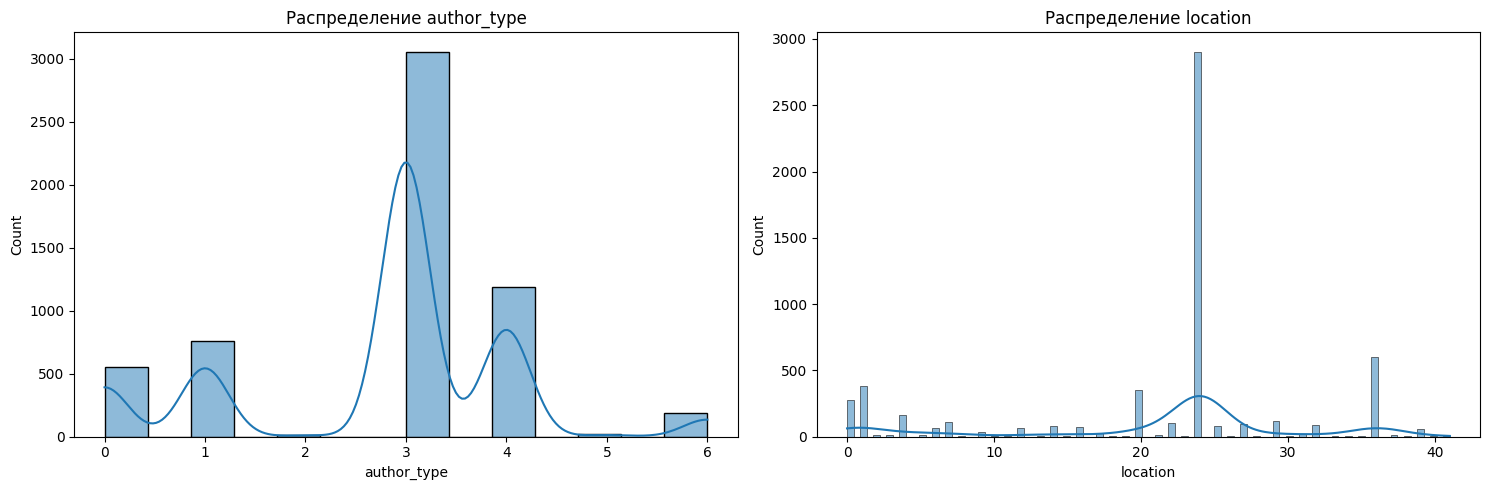

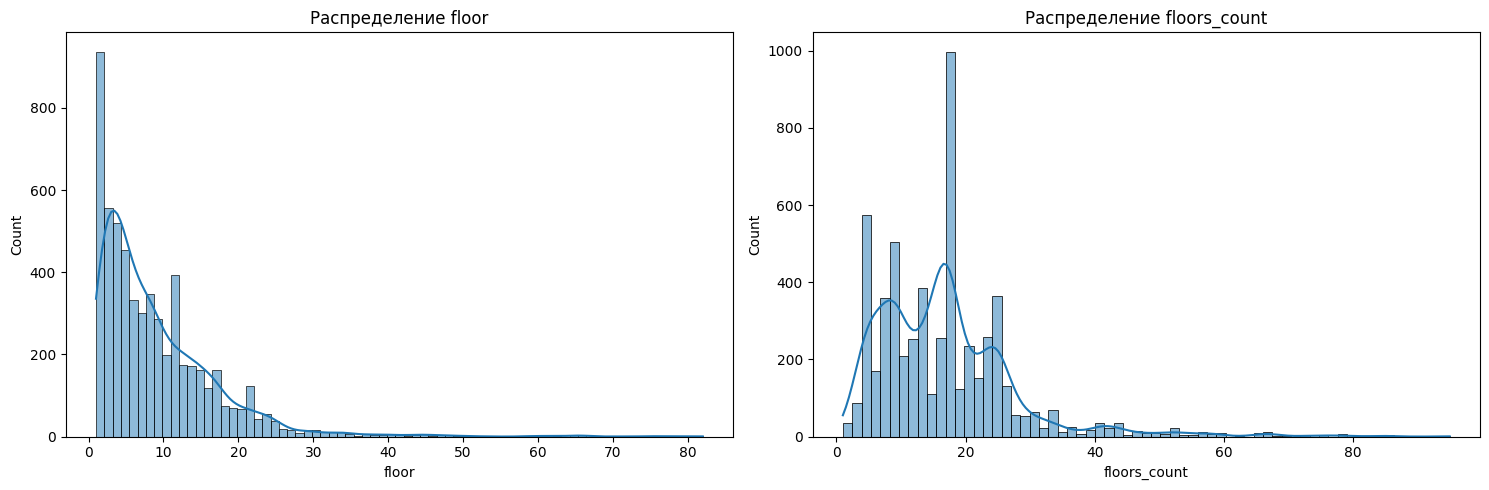

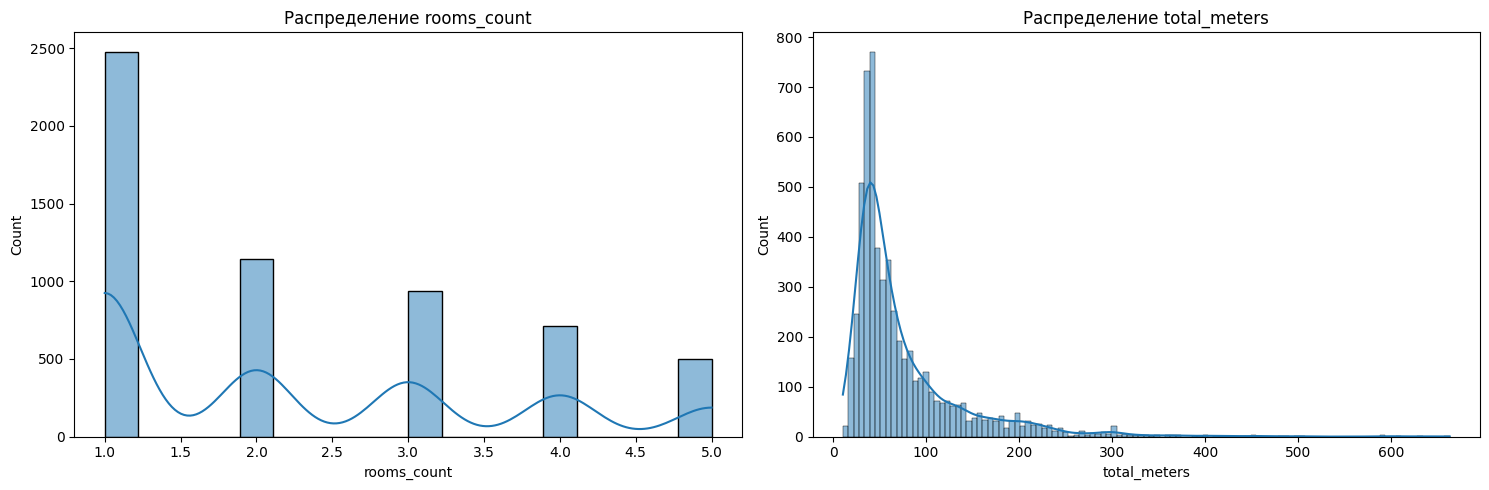

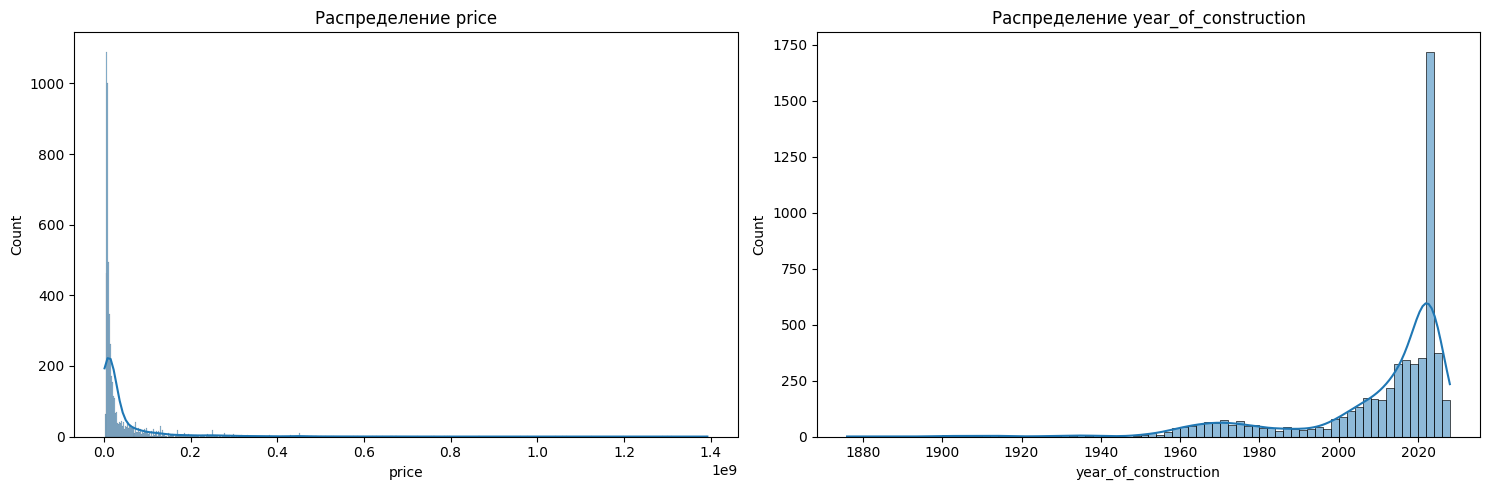

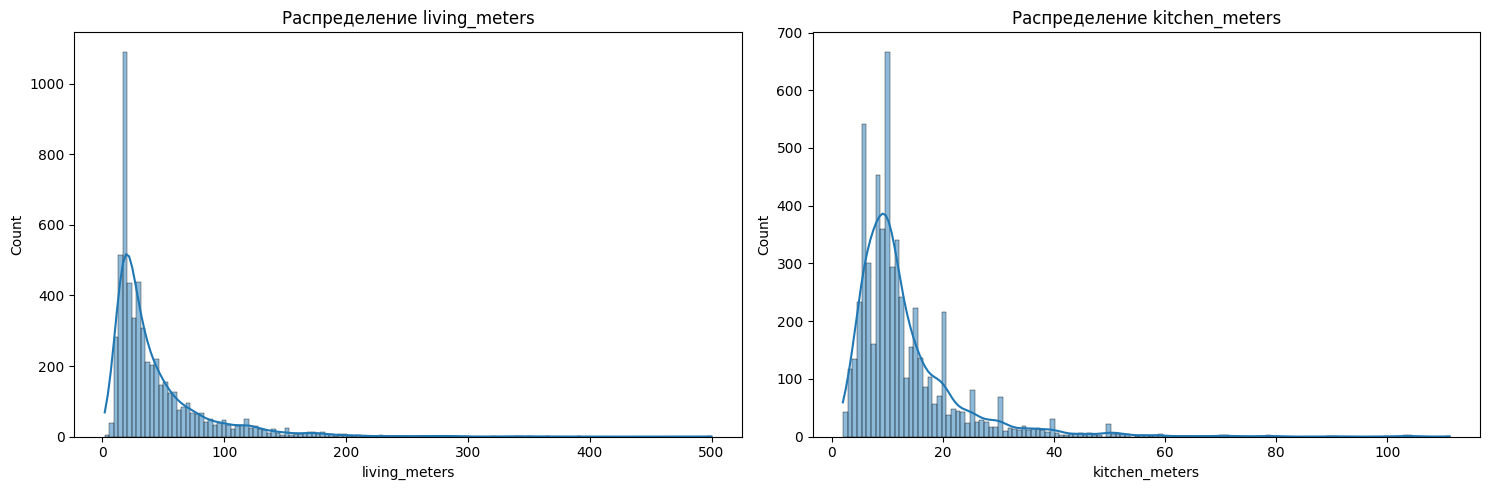

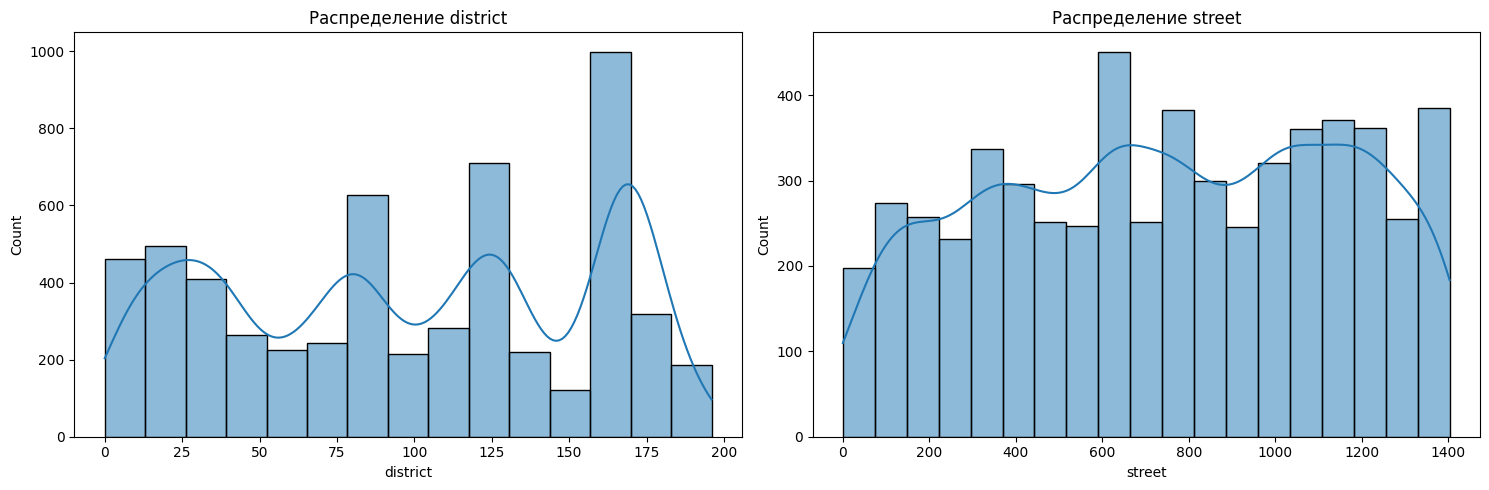

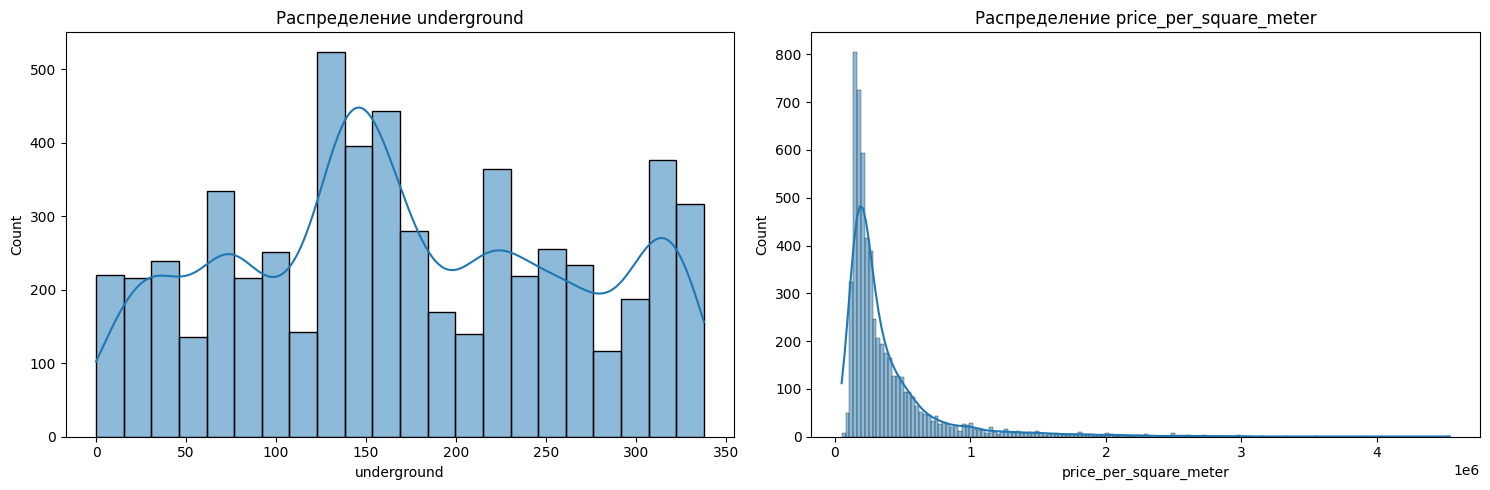

In [49]:
numerical_columns = [column for column in df.columns if df[column].dtype != 'object']

for i in range(0, len(numerical_columns), 2):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    for j, column in enumerate(numerical_columns[i:i+2]):
        sns.histplot(df[column], kde=True, ax=axs[j])
        axs[j].set_title(f'Распределение {column}')
    
    plt.tight_layout()
    plt.show()

по распределениям видно, что они приближены к нормальным, но имеются выбросы, с которыми нужно будет что-то делать

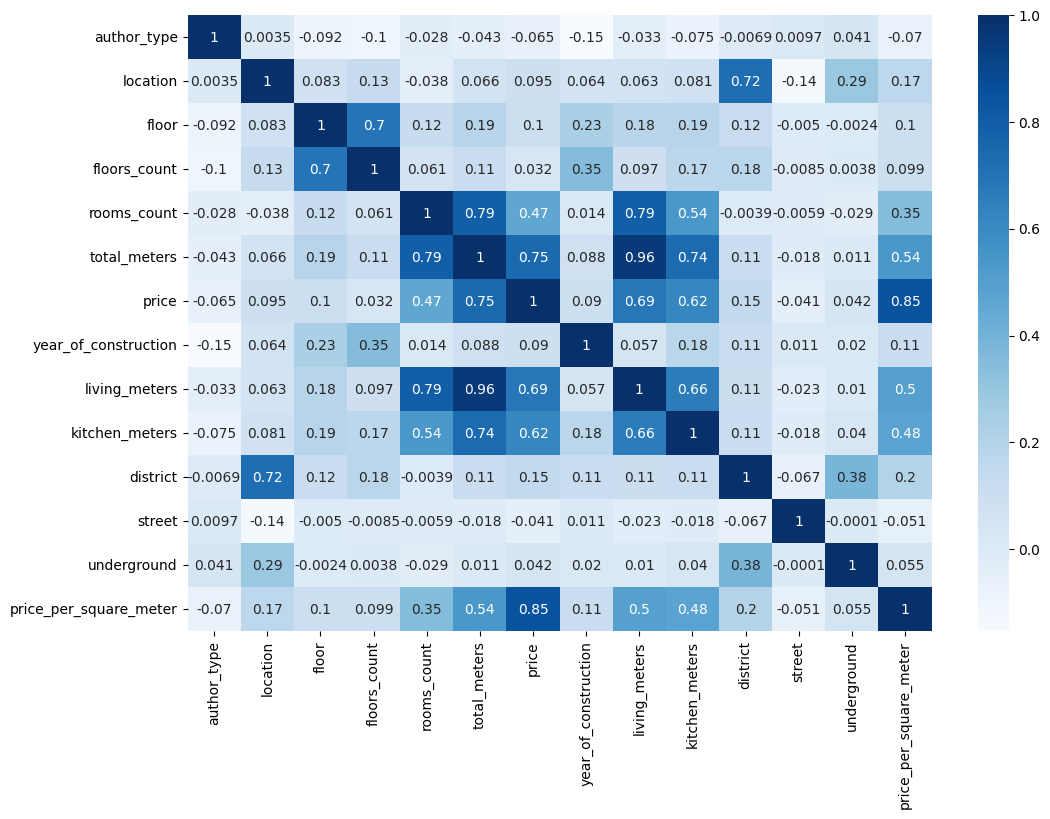

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

Можно сделать вывод о корреляции колонок: больше всего на цену на квадратный метр влияет метраж квартиры (общий, жилой и кухня), количество комнат, район, город, этаж, количество этажей и год постройки.

Улица, метро и кто продаёт квартиру меньше всего влияют на целевую переменную.